In [ ]:
import numpy as np #Numpy(Numerical Python) used for performing mathematical and logical operation on Arrays.
import matplotlib.pyplot as plt #Pandas(panel data) is being used here for data exploration and modeling.
import pandas as pd #Matplotlib is a comprehensive library for creating static, animated, and interactive visualization.
from sklearn import datasets #standard datasets, for instance the iris and digits datasets for classification. 
import seaborn as sns #Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.
from sklearn.cluster import KMeans



In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [ ]:
iris_df = pd.read_csv(r'Iris.csv')

In [ ]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


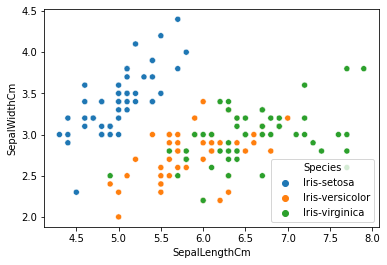

In [ ]:
sns.scatterplot(x=iris_df["SepalLengthCm"], y=iris_df["SepalWidthCm"], hue=iris_df["Species"])
plt.show()

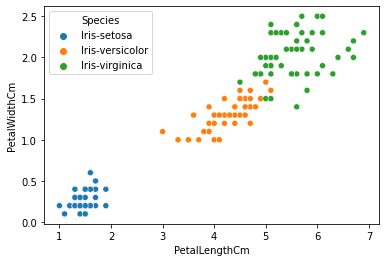

In [ ]:
sns.scatterplot(x=iris_df["PetalLengthCm"], y=iris_df["PetalWidthCm"], hue=iris_df["Species"])
plt.show()

In [ ]:
x = iris_df.iloc[:, [0, 1, 2, 3]].values

In [ ]:
wcss=[]
for i in range(1,20):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=500,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

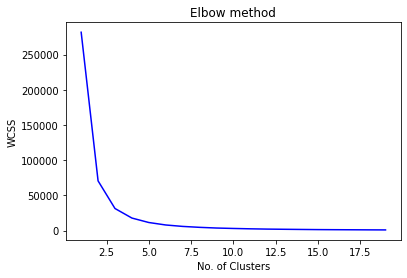

In [ ]:
plt.plot(range(1,20),wcss,c='BLUE')
plt.title('Elbow method')                                  
plt.xlabel('No. of Clusters')                                   
plt.ylabel('WCSS')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 500, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

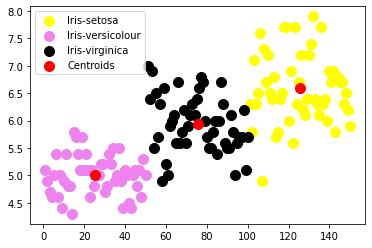

In [ ]:

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],                 
            s = 100, c = 'yellow', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'violet', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'black', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],      
            s = 100, c = 'red', label = 'Centroids')
plt.legend()